Instalar `seaborn`, `scikit-learn`

1. Entrar a directorio de trabajo en linea de comandos
2. Activar el entorno virtual
3. Correr el siguiente comando
```
pip install seaborn scikit-learn
```
4. Abrir una libreta de Jupyter nueva

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

---

In [3]:
import matplotlib.colors as mcolors

np.random.seed(19680801)

def plot_scatter(ax, prng, nb_samples=100):
    """Scatter plot."""
    for mu, sigma, marker in [(-.5, 0.75, 'o'), (0.75, 1., 's')]:
        x, y = prng.normal(loc=mu, scale=sigma, size=(2, nb_samples))
        ax.plot(x, y, ls='none', marker=marker)
    ax.set_xlabel('X-label')
    ax.set_title('Axes title')
    return ax


def plot_colored_lines(ax):
    """Plot lines with colors following the style color cycle."""
    t = np.linspace(-10, 10, 100)

    def sigmoid(t, t0):
        return 1 / (1 + np.exp(-(t - t0)))

    nb_colors = len(plt.rcParams['axes.prop_cycle'])
    shifts = np.linspace(-5, 5, nb_colors)
    amplitudes = np.linspace(1, 1.5, nb_colors)
    for t0, a in zip(shifts, amplitudes):
        ax.plot(t, a * sigmoid(t, t0), '-')
    ax.set_xlim(-10, 10)
    return ax


def plot_bar_graphs(ax, prng, min_value=5, max_value=25, nb_samples=5):
    """Plot two bar graphs side by side, with letters as x-tick labels."""
    x = np.arange(nb_samples)
    ya, yb = prng.randint(min_value, max_value, size=(2, nb_samples))
    width = 0.25
    ax.bar(x, ya, width)
    ax.bar(x + width, yb, width, color='C2')
    ax.set_xticks(x + width, labels=['a', 'b', 'c', 'd', 'e'])
    return ax


def plot_colored_circles(ax, prng, nb_samples=15):
    """
    Plot circle patches.

    NB: draws a fixed amount of samples, rather than using the length of
    the color cycle, because different styles may have different numbers
    of colors.
    """
    for sty_dict, j in zip(plt.rcParams['axes.prop_cycle'], range(nb_samples)):
        ax.add_patch(plt.Circle(prng.normal(scale=3, size=2),
                                radius=1.0, color=sty_dict['color']))
    # Force the limits to be the same across the styles (because different
    # styles may have different numbers of available colors).
    ax.set_xlim([-4, 8])
    ax.set_ylim([-5, 6])
    ax.set_aspect('equal', adjustable='box')  # to plot circles as circles
    return ax


def plot_image_and_patch(ax, prng, size=(20, 20)):
    """Plot an image with random values and superimpose a circular patch."""
    values = prng.random_sample(size=size)
    ax.imshow(values, interpolation='none')
    c = plt.Circle((5, 5), radius=5, label='patch')
    ax.add_patch(c)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])


def plot_histograms(ax, prng, nb_samples=10000):
    """Plot 4 histograms and a text annotation."""
    params = ((10, 10), (4, 12), (50, 12), (6, 55))
    for a, b in params:
        values = prng.beta(a, b, size=nb_samples)
        ax.hist(values, histtype="stepfilled", bins=30,
                alpha=0.8, density=True)
    # Add a small annotation.
    ax.annotate('Annotation', xy=(0.25, 4.25),
                xytext=(0.9, 0.9), textcoords=ax.transAxes,
                va="top", ha="right",
                bbox=dict(boxstyle="round", alpha=0.2),
                arrowprops=dict(
                          arrowstyle="->",
                          connectionstyle="angle,angleA=-95,angleB=35,rad=10"),
                )
    return ax


def plot_figure(style_label=""):
    """Setup and plot the demonstration figure with a given style."""
    # Use a dedicated RandomState instance to draw the same "random" values
    # across the different figures.
    prng = np.random.RandomState(96917002)

    fig, axs = plt.subplots(ncols=6, nrows=1, num=style_label,
                            figsize=(14.8, 2.7), constrained_layout=True)

    # make a suptitle, in the same style for all subfigures,
    # except those with dark backgrounds, which get a lighter color:
    background_color = mcolors.rgb_to_hsv(
        mcolors.to_rgb(plt.rcParams['figure.facecolor']))[2]
    if background_color < 0.5:
        title_color = [0.8, 0.8, 1]
    else:
        title_color = np.array([19, 6, 84]) / 256
    fig.suptitle(style_label, x=0.01, ha='left', color=title_color,
                 fontsize=14, fontfamily='DejaVu Sans', fontweight='normal')

    plot_scatter(axs[0], prng)
    plot_image_and_patch(axs[1], prng)
    plot_bar_graphs(axs[2], prng)
    plot_colored_circles(axs[3], prng)
    plot_colored_lines(axs[4])
    plot_histograms(axs[5], prng)

In [4]:
def mostrar_estilos():
    style_list = ['default', 'classic'] + sorted(
        style for style in plt.style.available
        if style != 'classic' and not style.startswith('_'))
    for style_label in style_list:
        with plt.rc_context({"figure.max_open_warning": len(style_list)}):
            with plt.style.context(style_label):
                plot_figure(style_label=style_label)
    plt.show()

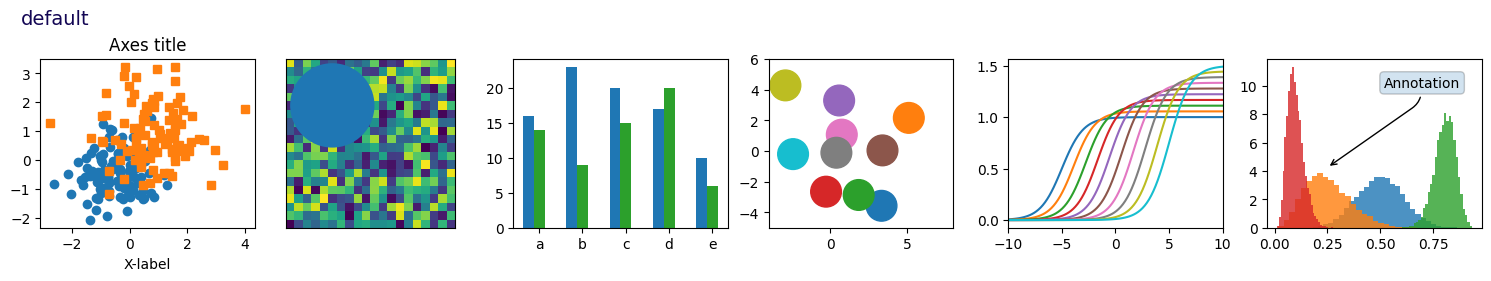

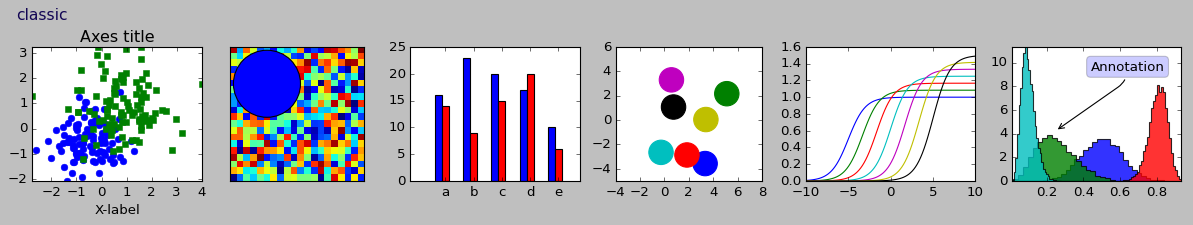

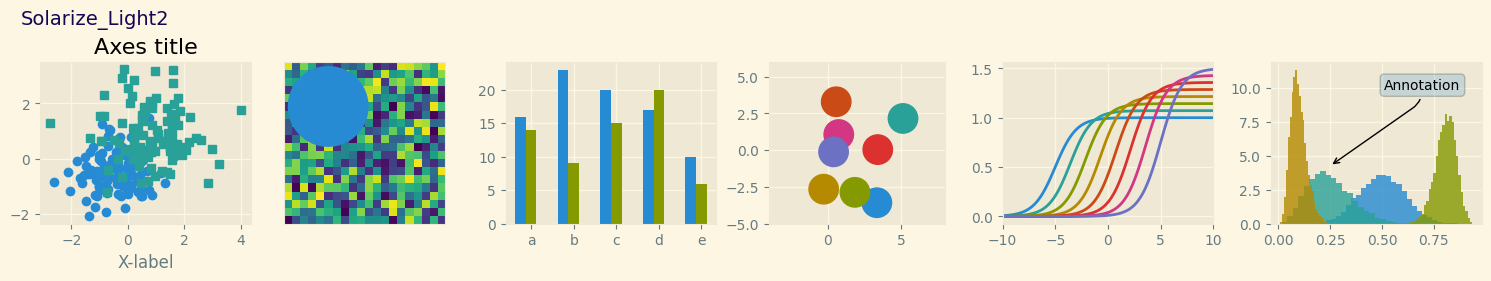

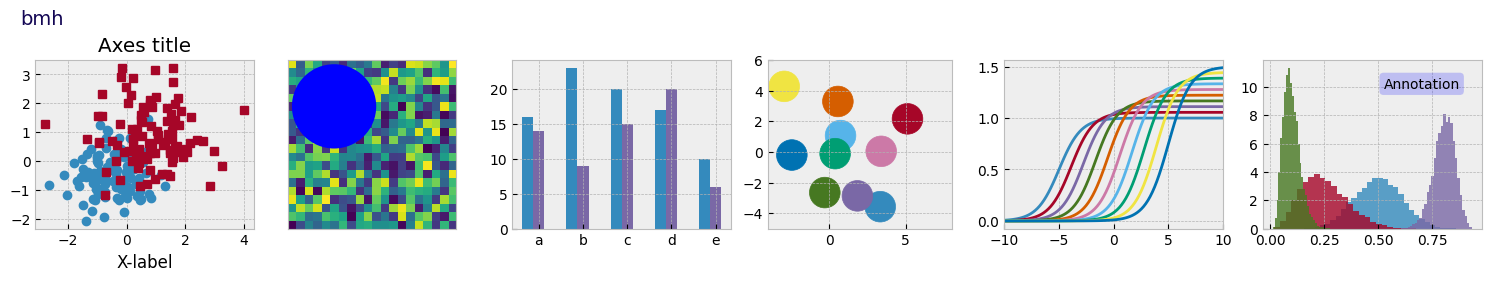

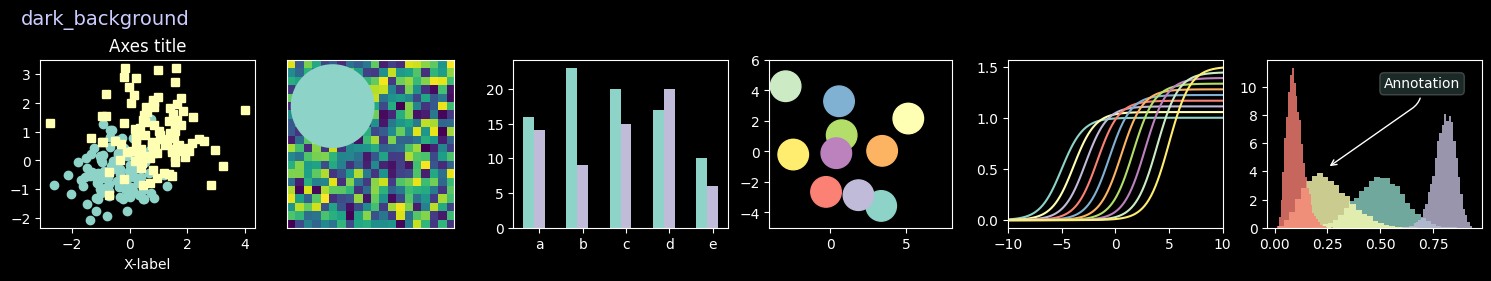

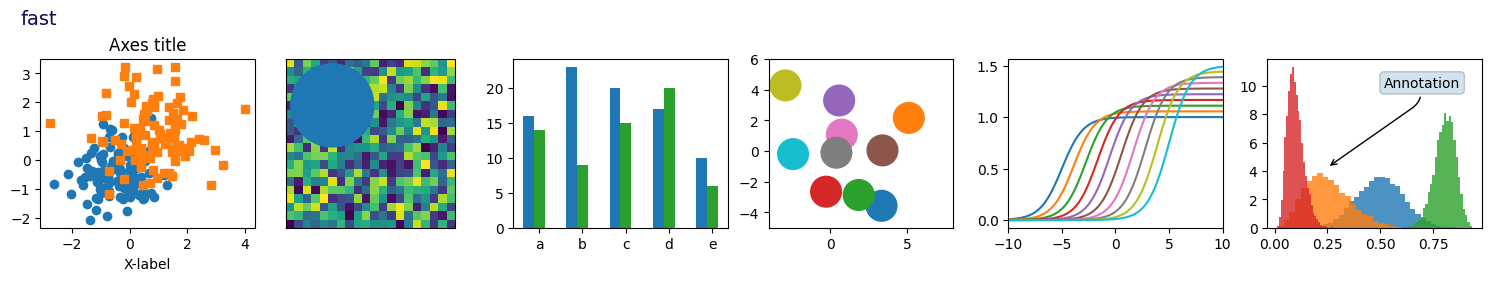

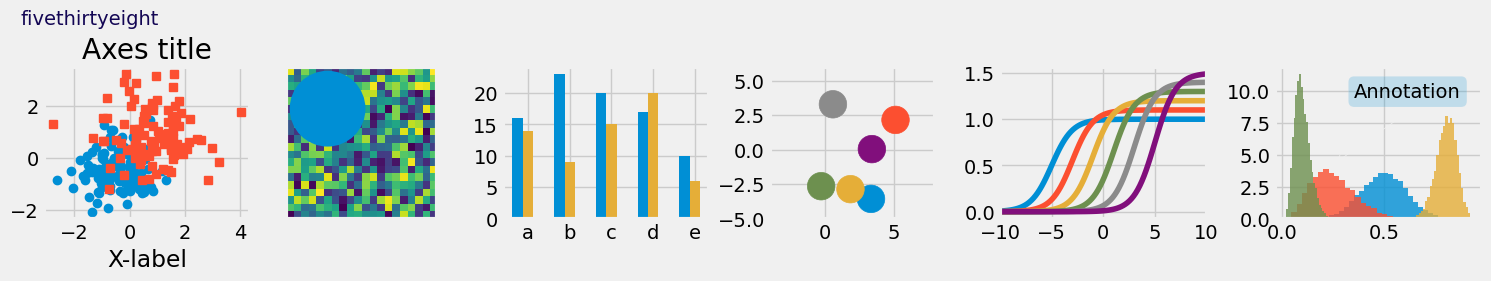

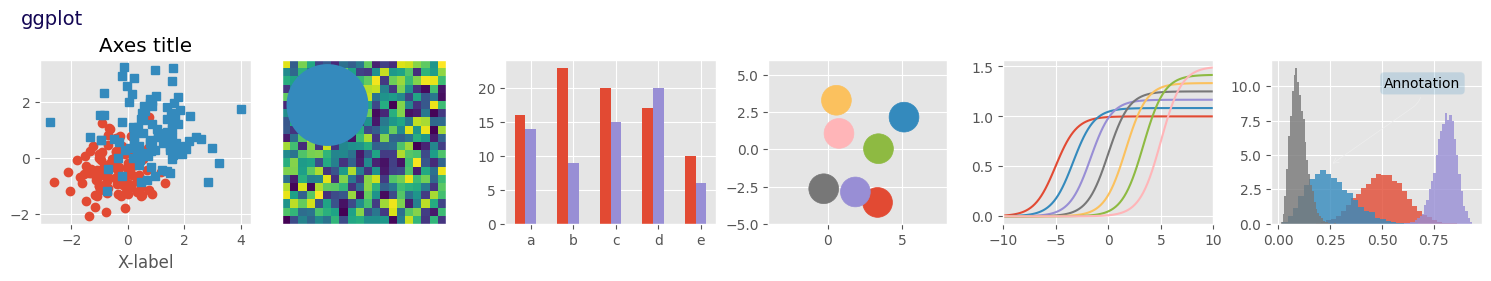

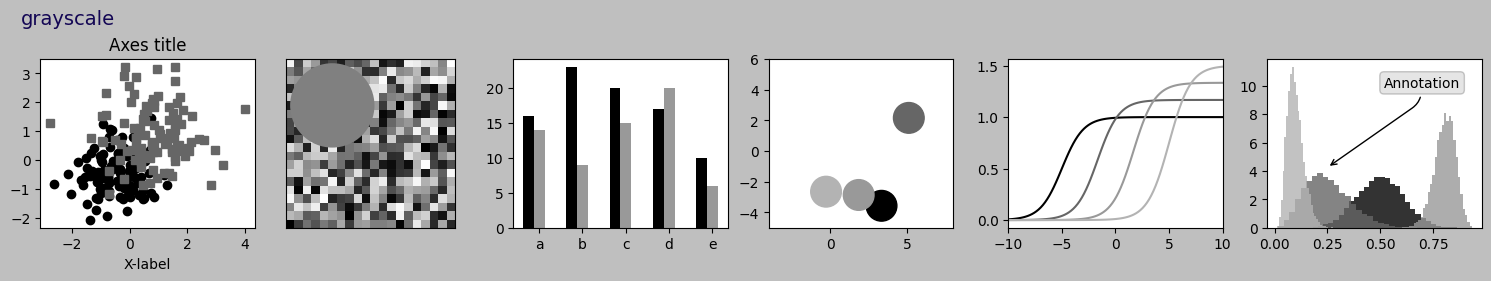

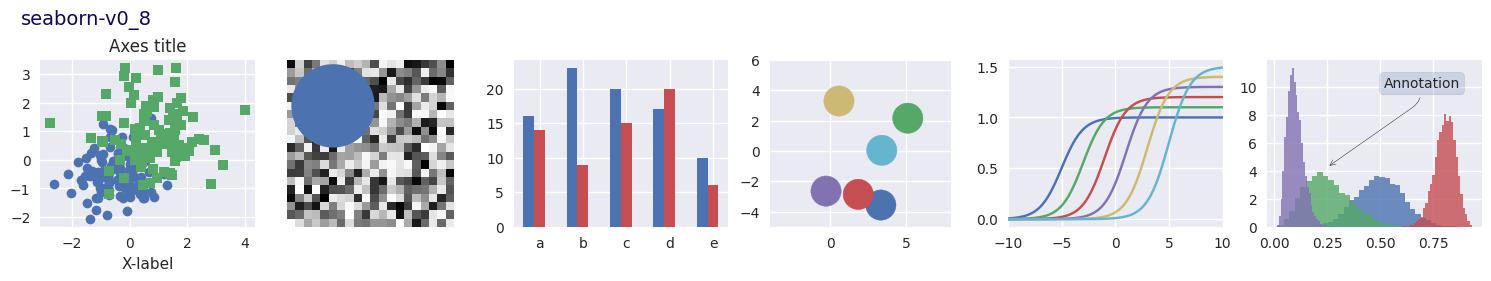

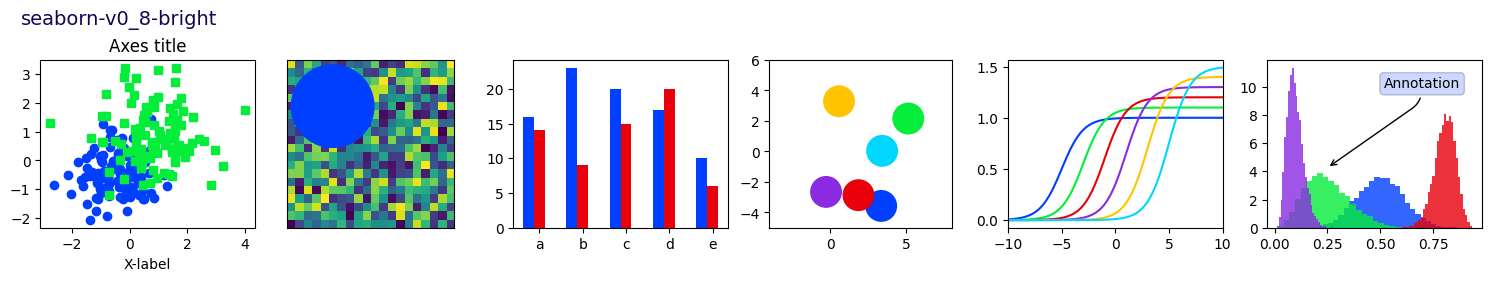

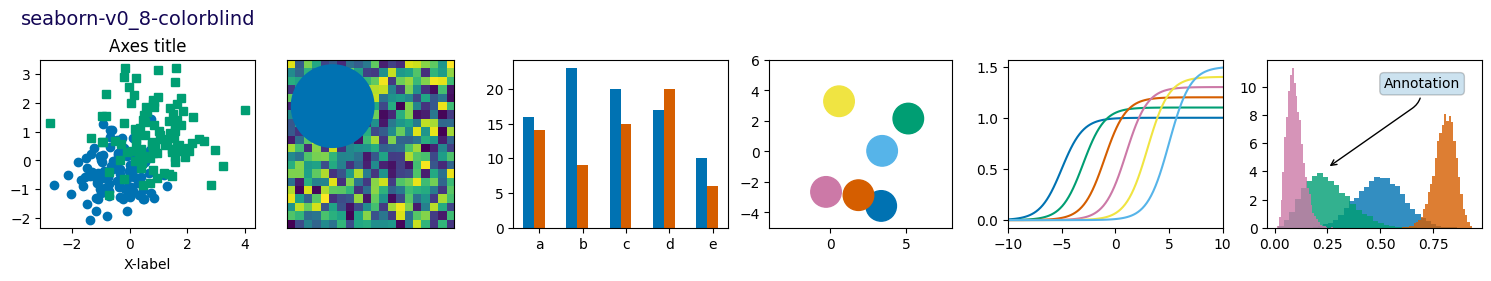

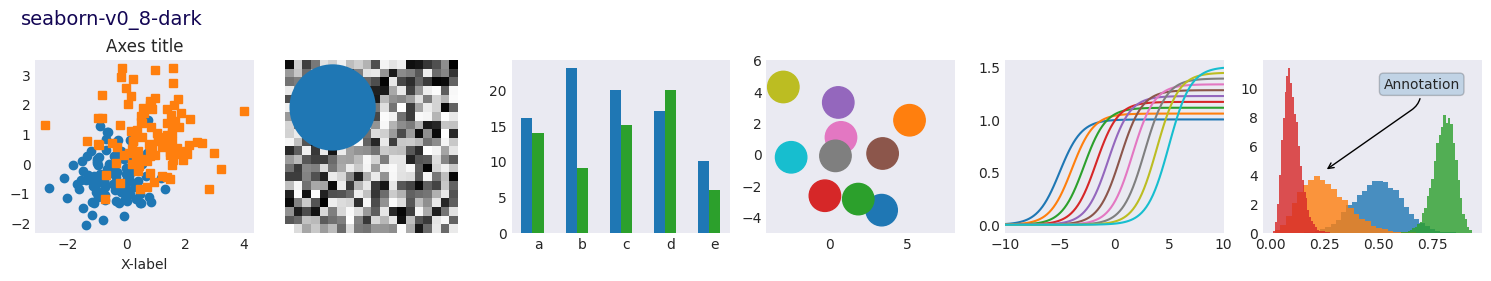

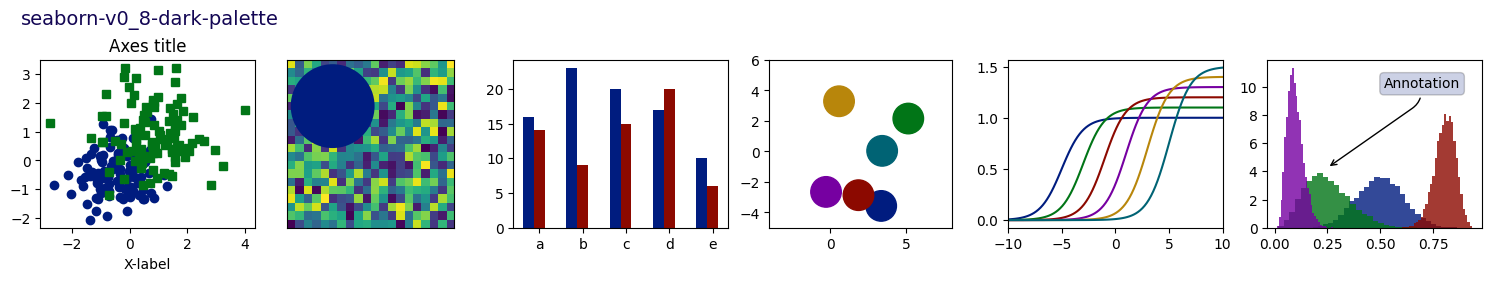

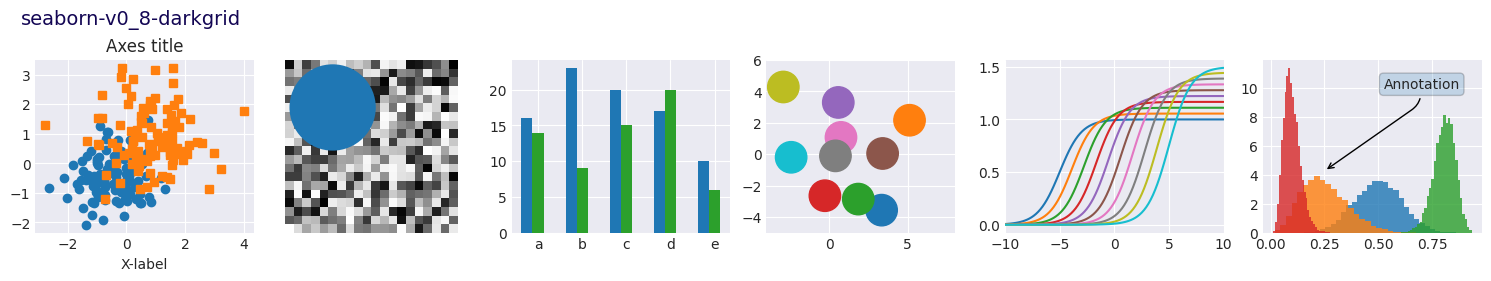

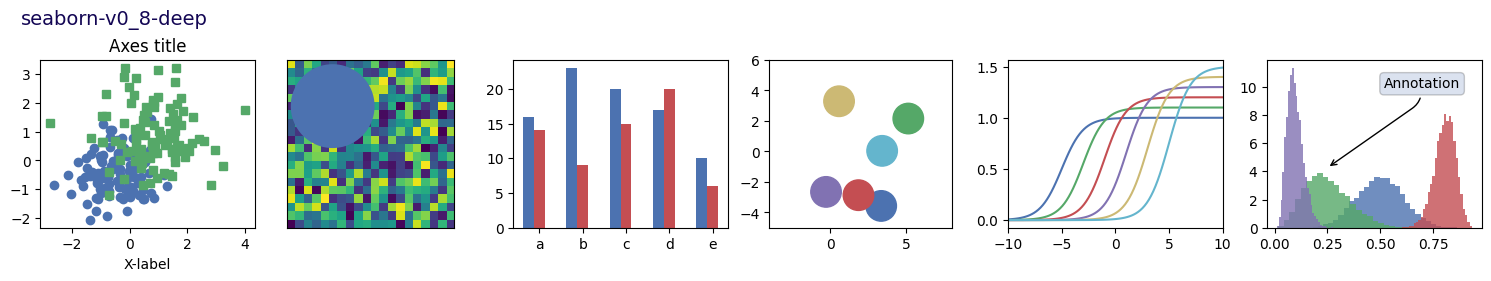

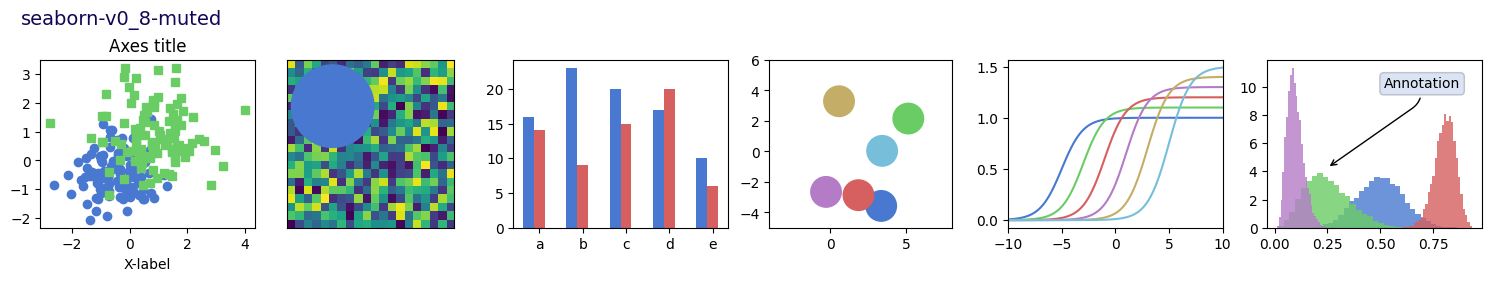

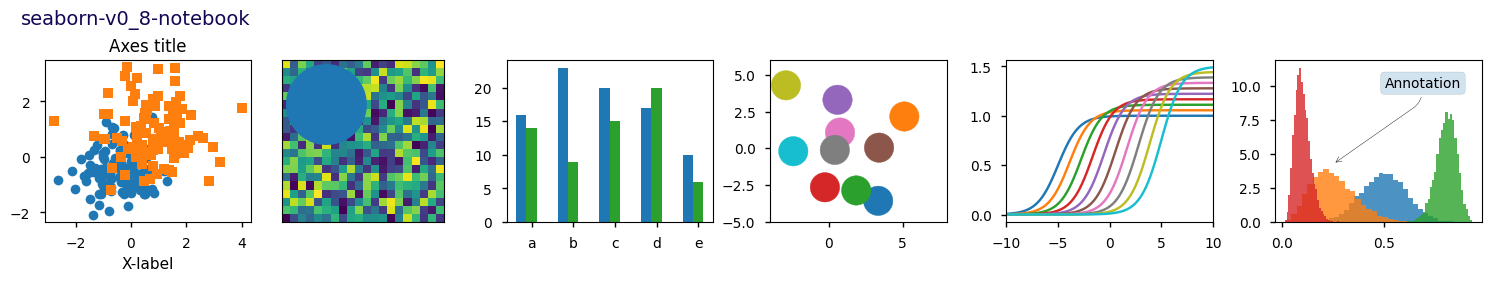

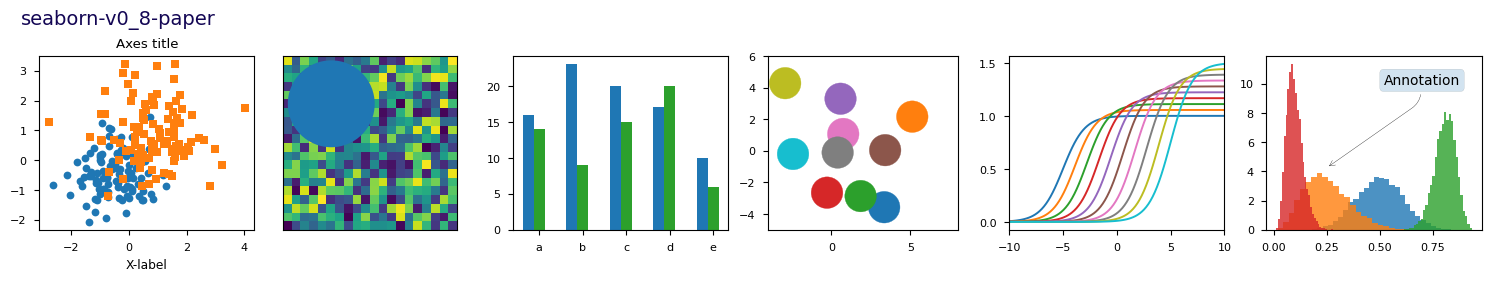

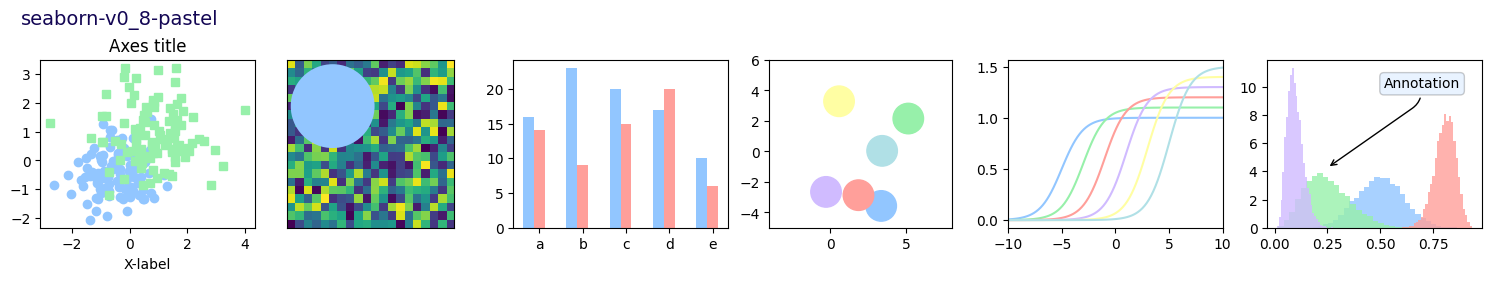

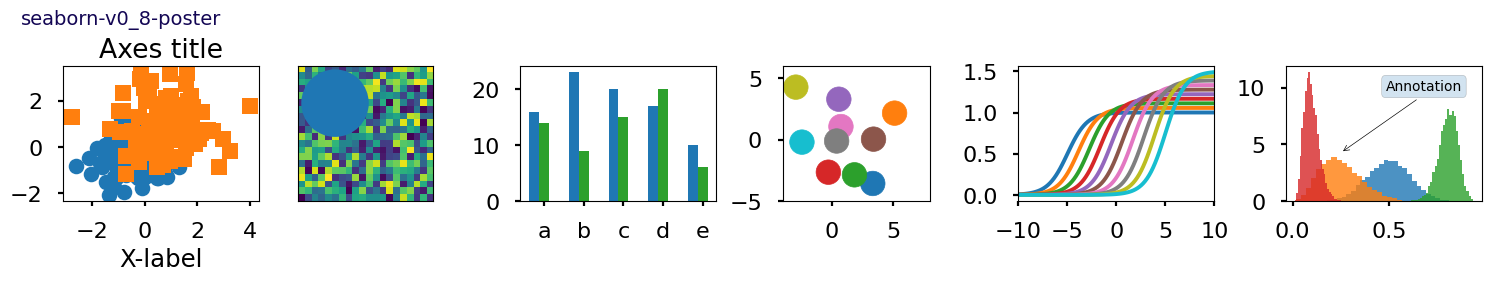

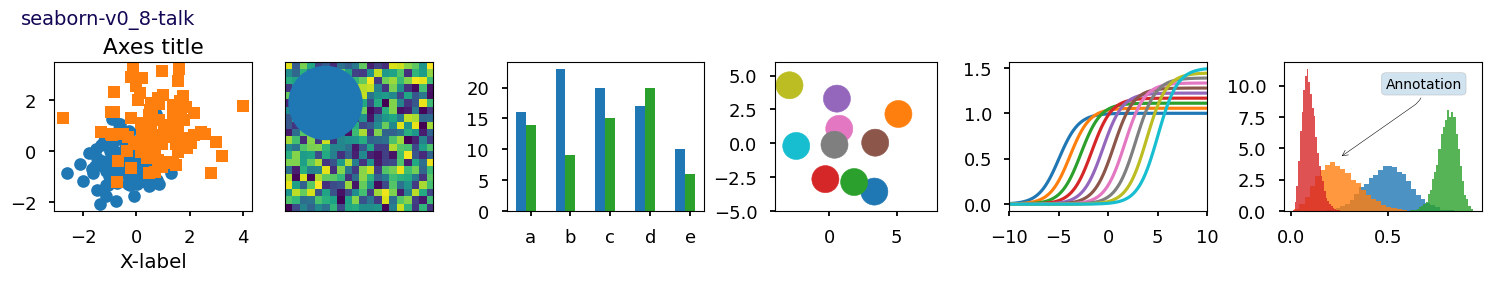

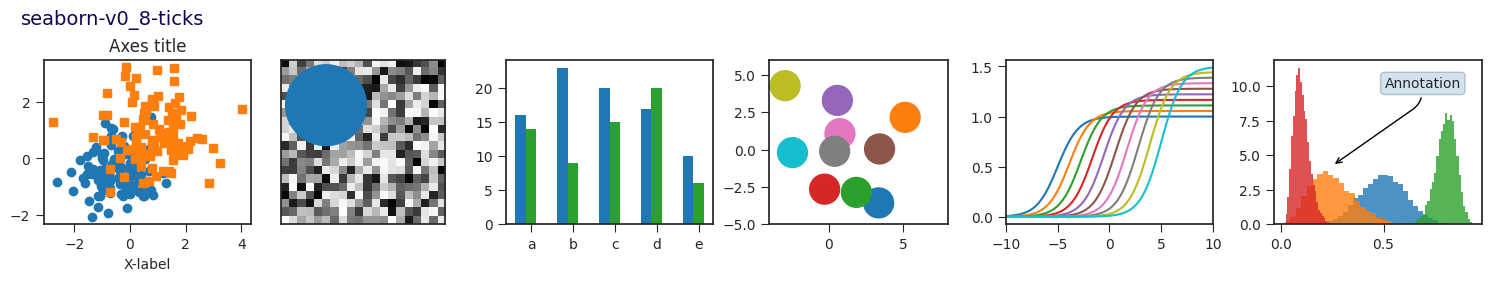

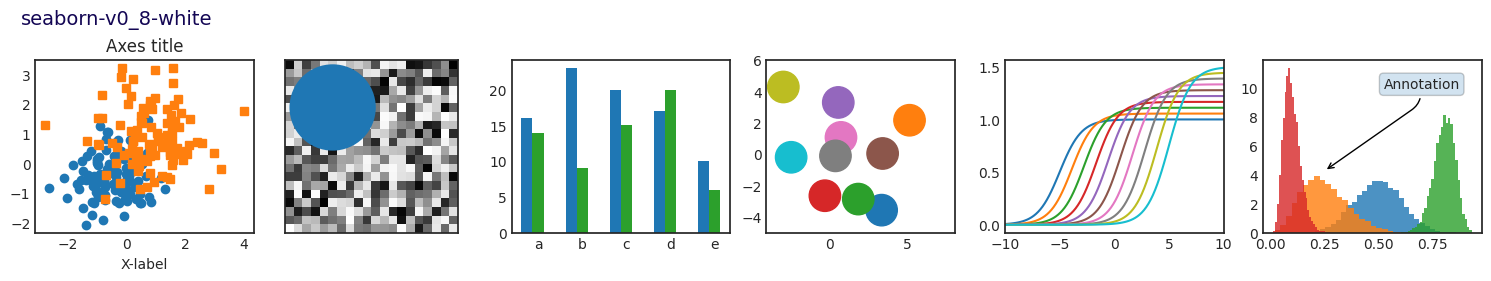

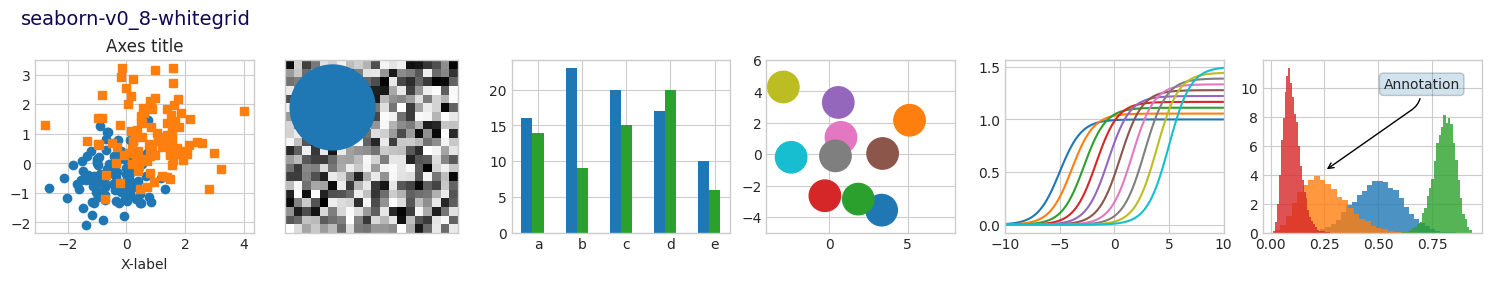

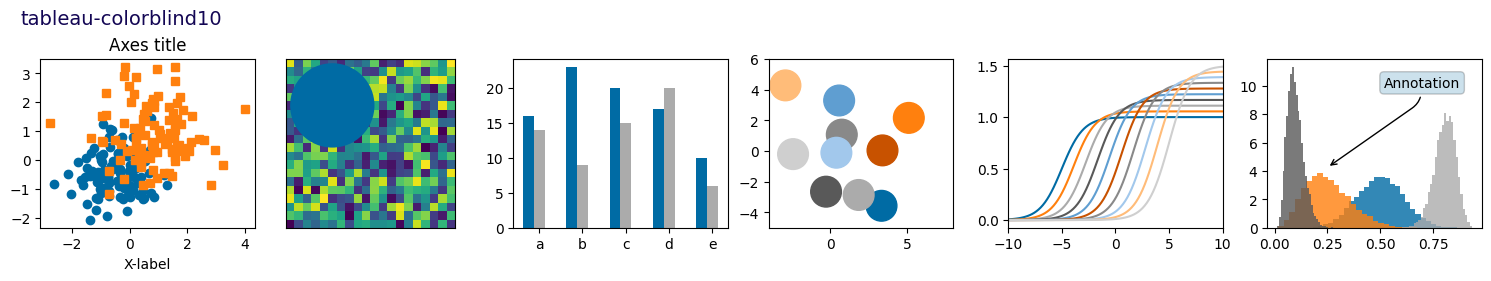

In [5]:
mostrar_estilos()

In [6]:
plt.style.use('default')

<Figure size 640x480 with 0 Axes>

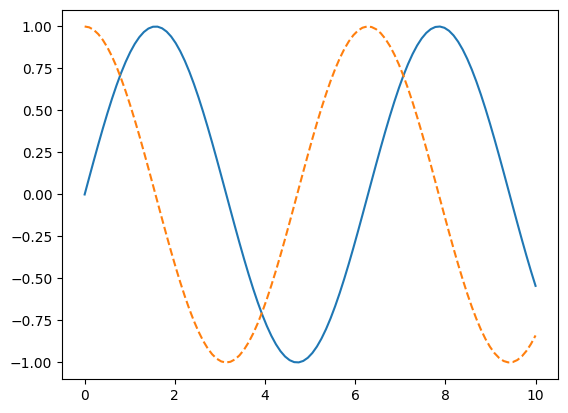

In [13]:
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [10]:
fig.savefig('sencos.png', dpi=100)

# Interfaz estilo MATLAB

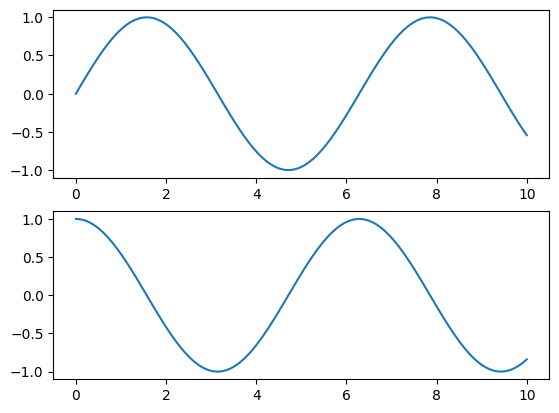

In [15]:
# creamos una figura para la gráfica
plt.figure()

# creamos el primero de dos paneles y fijamos ejes actuales
plt.subplot(2, 1, 1) # renglones, columnas y numero de panel
plt.plot(x, np.sin(x))

# creamos el segundo de dos paneles y fijamos ejes actuales
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Con este estilo de programas, el estado de la figura es implícito, podemos obtener la figura actual con `plt.gcf()` (Get Current Figure) y los ejes actuales con `plt.gca()` (Get Current Axes).

# Interfaz orientada a objetos

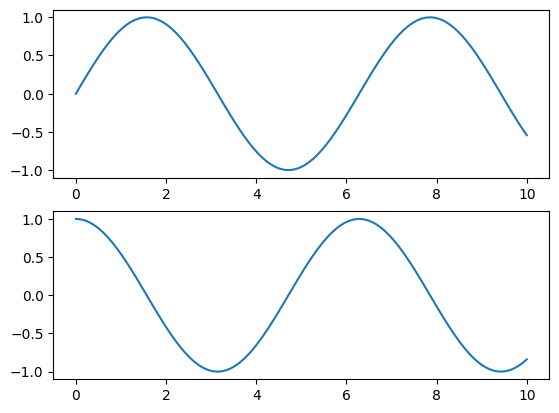

In [22]:
# Creamos dos subplots y obtenemos la figura y la lista de ejes.
fig, ax = plt.subplots(2, 1)

# Graficamos sobre los ejes correspondientes.
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

# Gráficas simples

In [26]:
import seaborn as sns
sns.set_theme(style='whitegrid')

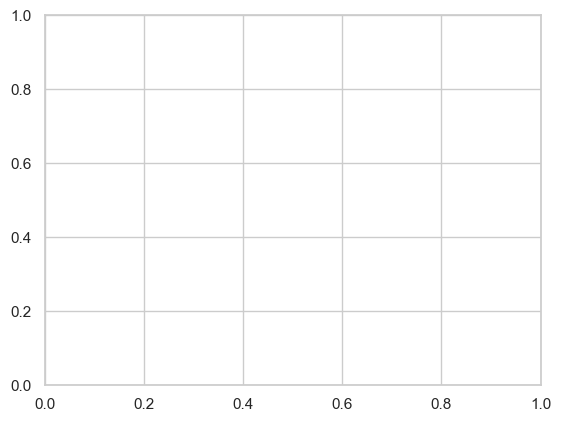

In [27]:
fig = plt.figure()
ax = plt.axes()

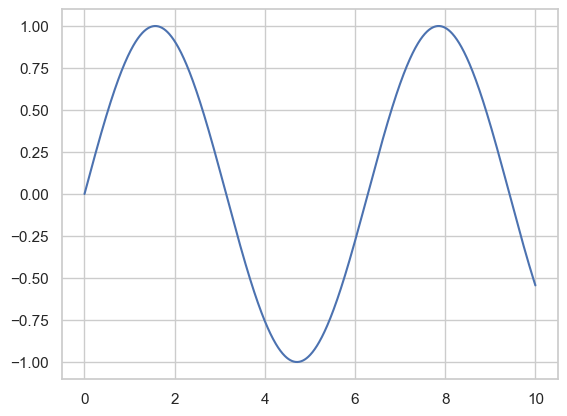

In [28]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

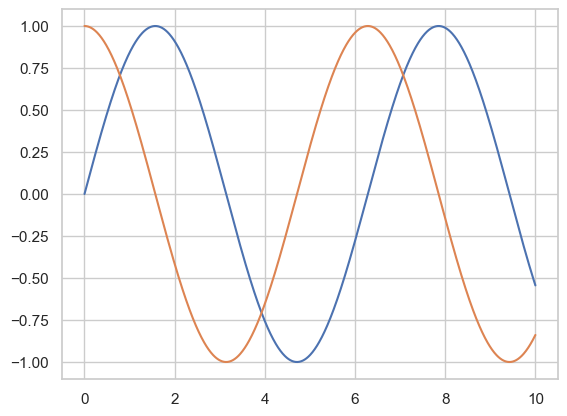

In [29]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x));

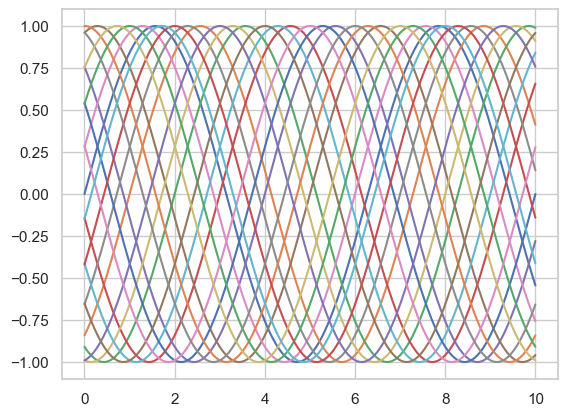

In [32]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
for i in range(20):
    ax.plot(x, np.sin(x - i));

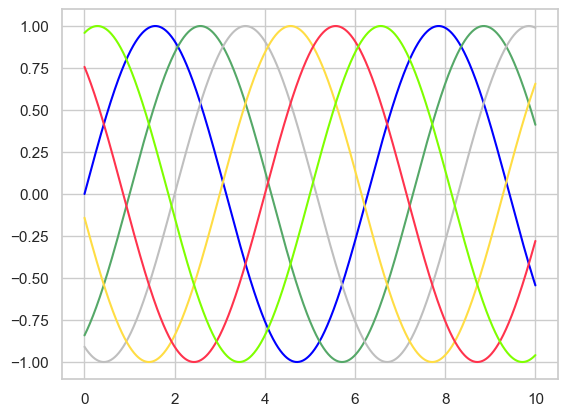

In [33]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
colors = [
    'blue',          # nombre de color
    'g',             # Abreviación en rgbcmyk
    '0.75',          # Escala de gris [0,1]
    '#FFDD44',       # Código Hex (RRGGBB)
    (1.0, 0.2, 0.3), # tupla RGB
    'chartreuse',    # nombre de color HTML
]
for i, color in zip(range(6), colors):
    ax.plot(x, np.sin(x - i), color=color);

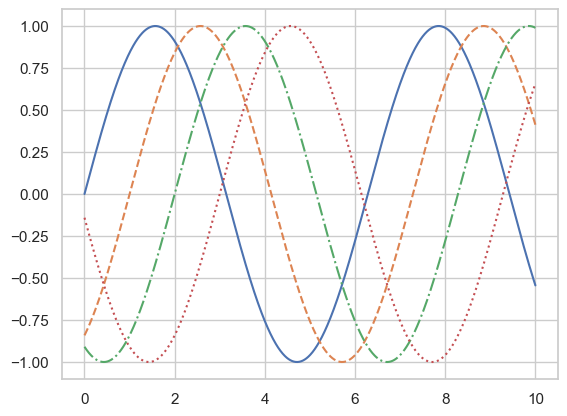

In [34]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
styles = [
    'solid',        # también '-'
    'dashed',       # también '--'
    'dashdot',      # también '-.'
    'dotted',       # también ':'
]
for i, style in zip(range(4), styles):
    ax.plot(x, np.sin(x - i), linestyle=style);

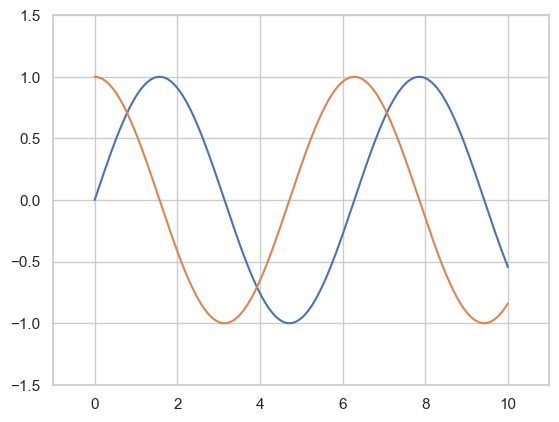

In [35]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))
ax.set_xlim(-1,11);
ax.set_ylim(-1.5,1.5);

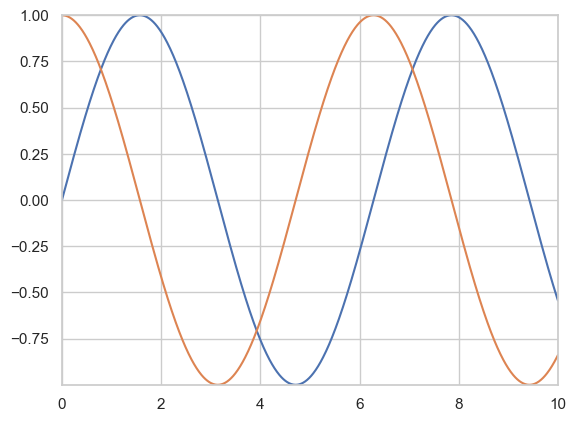

In [36]:
fig = plt.figure()
ax = plt.axes()
ax.autoscale(enable=True, axis='both', tight=True)
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));
ax.plot(x, np.cos(x));

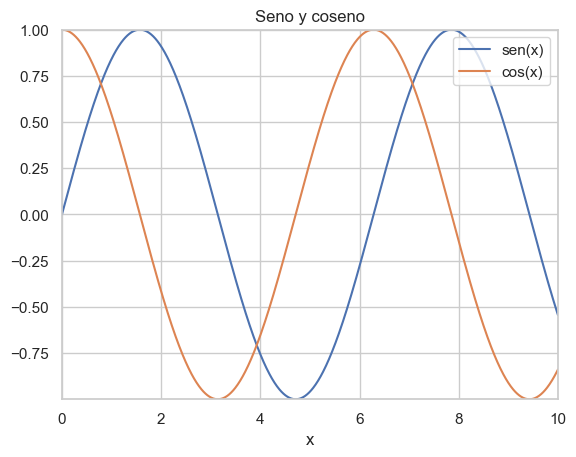

In [37]:
fig = plt.figure()
ax = plt.axes()
ax.autoscale(enable=True, axis='both', tight=True)

x = np.linspace(0, 10, 1000)

ax.set_title("Seno y coseno");
ax.set_xlabel("x");
ax.plot(x, np.sin(x), label="sen(x)");
ax.plot(x, np.cos(x), label="cos(x)");

ax.legend(loc="upper right");

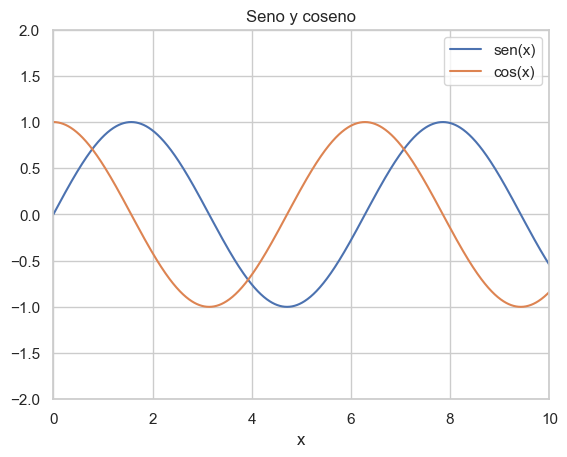

In [38]:
fig = plt.figure()
ax = plt.axes()
ax.autoscale(enable=True, axis='both', tight=True)

x = np.linspace(0, 10, 1000)

ax.plot(x, np.sin(x), label="sen(x)");
ax.plot(x, np.cos(x), label="cos(x)");

ax.set(
    xlim=(0, 10),
    ylim=(-2, 2),
    xlabel="x",
    title="Seno y coseno",
);
ax.legend(loc="upper right");

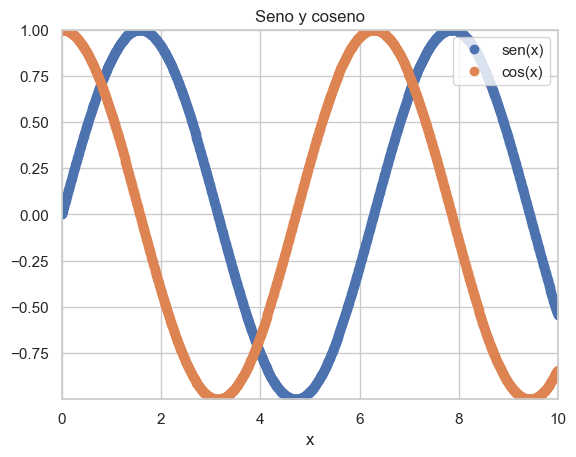

In [39]:
fig = plt.figure()
ax = plt.axes()
ax.autoscale(enable=True, axis='both', tight=True)

x = np.linspace(0, 10, 1000)

ax.set_title("Seno y coseno");
ax.set_xlabel("x");
ax.plot(x, np.sin(x), 'o', label="sen(x)");
ax.plot(x, np.cos(x), 'o', label="cos(x)");

ax.legend(loc="upper right");

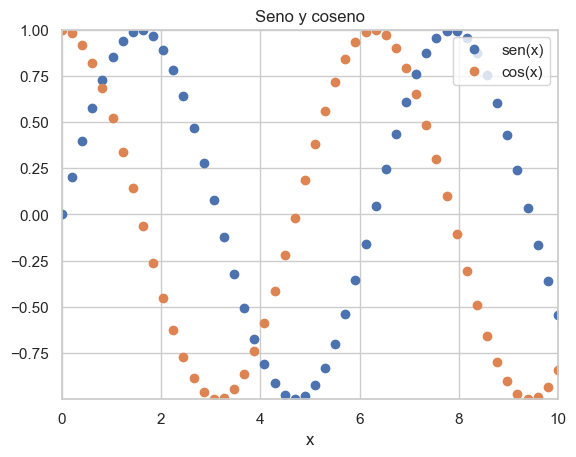

In [52]:
fig = plt.figure()
ax = plt.axes()
ax.autoscale(enable=True, axis='both', tight=True)

x = np.linspace(0, 10, 50)

ax.set_title("Seno y coseno");
ax.set_xlabel("x");
ax.plot(x, np.sin(x), 'o', label="sen(x)");
ax.plot(x, np.cos(x), 'o', label="cos(x)");

ax.legend(loc="upper right");

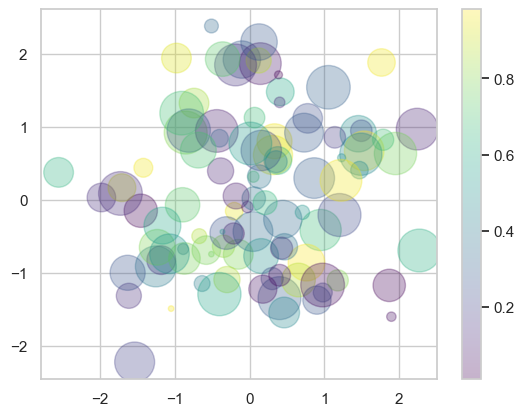

In [56]:
fig = plt.figure()
ax = plt.axes()
ax.autoscale(enable=True, axis='both', tight=False)

rng = np.random.RandomState(0)

x = rng.randn(100)
y = rng.randn(100)

colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

m = ax.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
fig.colorbar(m);

In [57]:
from sklearn.datasets import load_iris

In [58]:
iris = load_iris()
features = iris.data.T

In [60]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

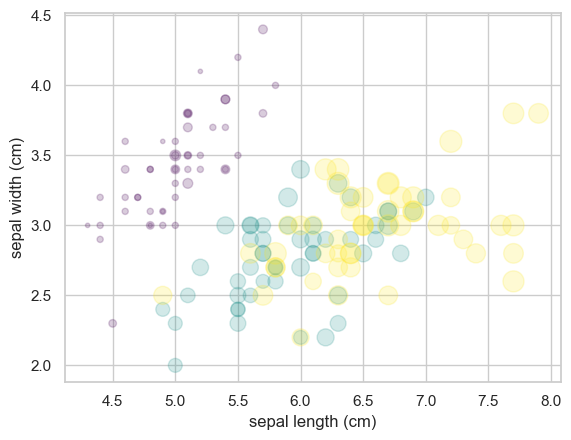

In [61]:
fig = plt.figure()
ax = plt.axes()
ax.autoscale(enable=True, axis='both', tight=False)

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])

ax.scatter(
    features[0],
    features[1],
    alpha=0.2,
    s=100*features[3],
    c=iris.target,
    cmap='viridis',
);